In [1]:
import sklearn.datasets
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)

In [2]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 2).values

In [3]:
svm_clf = make_pipeline(StandardScaler(), LinearSVC(dual=False, C=1, random_state=42))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=False, random_state=42))])

In [4]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new), svm_clf.decision_function(X_new)

(array([ True, False]), array([ 0.66163816, -0.22035761]))

In [5]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(dual=False, C=10, max_iter=10_000, random_state=42))
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, dual=False, max_iter=10000, random_state=42))])

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y, polynomial_svm_clf.predict(X))

0.99

In [7]:
from sklearn.svm import SVC

polynomial_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel='poly', degree=3, coef0=1, C=5))

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [8]:
accuracy_score(y, polynomial_svm_clf.predict(X))

0.98

In [85]:
from sklearn.svm import LinearSVR
import numpy as np

m = 100
X = np.random.rand(m, 1)
y = (X * (X - 0.5) + 0.05 * np.random.randn(m, 1)).ravel()

svm_reg = make_pipeline(StandardScaler(), LinearSVR(dual='auto', epsilon=0.5, random_state=42))

svm_reg.fit(X, y)

np.c_[X, y, svm_reg.predict(X)]

array([[ 4.49236054e-01,  4.52061612e-02,  5.36550305e-03],
       [ 6.82396218e-01,  1.54841383e-01,  1.78544673e-02],
       [ 8.00903124e-01,  2.14162362e-01,  2.42021575e-02],
       [ 4.14639644e-01,  2.07916224e-02,  3.51238495e-03],
       [ 8.77975967e-01,  3.21737529e-01,  2.83304784e-02],
       [ 9.42784592e-01,  5.15573043e-01,  3.18018801e-02],
       [ 8.71922470e-01,  3.92330171e-01,  2.80062296e-02],
       [ 6.03022338e-01, -3.64244058e-02,  1.36028939e-02],
       [ 2.58064370e-01, -4.45089555e-02, -4.87439499e-03],
       [ 7.79365141e-01,  2.32077154e-01,  2.30484995e-02],
       [ 6.97468282e-01,  1.09091241e-01,  1.86617855e-02],
       [ 5.97382057e-01,  5.06459730e-02,  1.33007785e-02],
       [ 3.24442194e-01,  2.65979669e-02, -1.31894090e-03],
       [ 8.51911214e-01,  2.76654049e-01,  2.69343489e-02],
       [ 2.67362707e-01, -7.59743406e-02, -4.37633997e-03],
       [ 6.68238010e-01,  1.25184686e-01,  1.70960986e-02],
       [ 3.07465957e-01, -3.15509603e-02

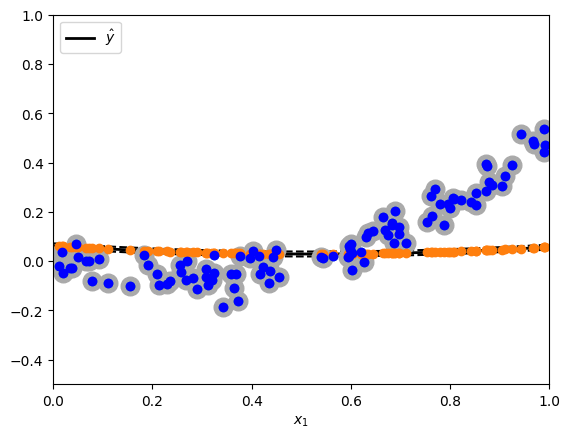

In [123]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
    svm_reg_support = find_support_vectors(svm_reg, X, y)
    plt.scatter(X[svm_reg_support], y[svm_reg_support], s=180,
                facecolors='#AAA', zorder=-1)
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)

svm_poly_reg = make_pipeline(StandardScaler(), SVR(kernel='poly', degree=2, C=0.01, epsilon=0.01))
svm_poly_reg.fit(X, y)

np.c_[X, y, svm_reg.predict(X)]

plt.scatter(X, y)
plt.scatter(X, svm_poly_reg.predict(X))
plot_svm_regression(svm_poly_reg, X, y, [0, 1, -0.5, 1])

In [191]:
n = 1

X = np.random.rand(100, n)
Xz = np.arange(100) / 100
X = np.c_[X, Xz]

X = X @ np.random.randn(n + 1, n + 1)

y = np.concatenate([np.zeros(50), np.ones(50)])

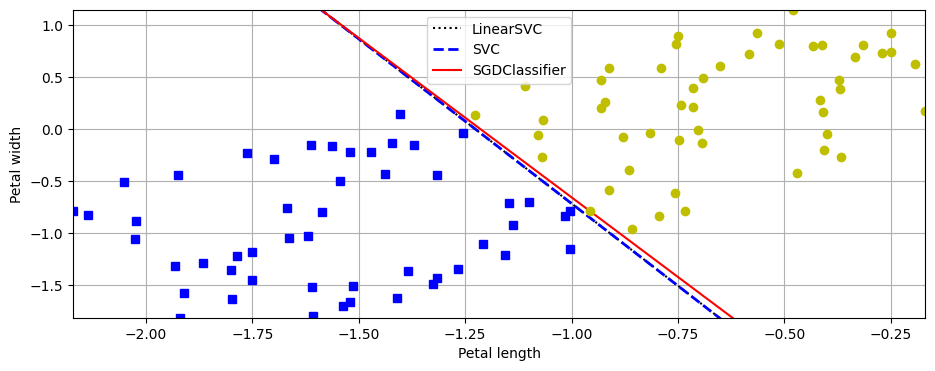

In [197]:
from sklearn.linear_model import SGDClassifier

linear_svc = LinearSVC(dual='auto', loss='hinge', C=5)
svc = SVC(kernel='linear', C=5)
sgd_clf = SGDClassifier(alpha=0.05)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linear_svc.fit(X_scaled, y)
svc.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

yhat_linear_svc = linear_svc.predict(X_scaled)
yhat_svc = svc.predict(X_scaled)
yhat_sgd_clf = sgd_clf.predict(X_scaled)

np.c_[yhat_linear_svc, yhat_svc, yhat_sgd_clf]

def compute_decision_boundary(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

lin_line = compute_decision_boundary(linear_svc)
svc_line = compute_decision_boundary(svc)
sgd_line = compute_decision_boundary(sgd_clf)

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")

min_axis = np.min(X, axis=0)
max_axis = np.max(X, axis=0)

plt.axis([min_axis[0], max_axis[0], min_axis[1], max_axis[1]])
plt.grid()

plt.show()

In [202]:
from sklearn import datasets
wine_data = datasets.load_wine()

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


X_train, X_test, y_train, y_test = train_test_split(wine_data.data, wine_data.target, random_state=42)

linear_svm_clf = make_pipeline(StandardScaler(), LinearSVC(dual=False))
svm_clf = make_pipeline(StandardScaler(), SVC(C=9.925589984899778, gamma=0.011986281799901176))

linear_svm_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)

print(cross_val_score(linear_svm_clf, X_train, y_train, scoring='accuracy', cv=5).mean(), accuracy_score(y_test, linear_svm_clf.predict(X_test)))
cross_val_score(svm_clf, X_train, y_train, scoring='accuracy', cv=5).mean(), accuracy_score(y_test, svm_clf.predict(X_test))

0.9774928774928775 0.9777777777777777


(0.9925925925925926, 0.9777777777777777)